### Task 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! 

Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


### Answer

Пусть $ A $ - событие: у подсудимого была редкая группа крови, $ B $ - подсудимый невиновен

Ошибки:

   1) Из его слов $P(A|B) = P(A)$, что не так
   
   2) Сделал вывод из $P(A) = 0.01$, что $P(\overline B) = 0.99$

Прокурор оценил $ P(A|B) $ как 1% (хотя имел ввиду $P(A)$) и отсюда сделал вывод, что $P(\overline B)$ = 99% (прям со слов).

Должен был оценить $P(B|A)$ или $P(\overline B | A)$

### Task 2

Затем выходит адвокат, объясняет ошибки прокурора, а сам говорит следующее: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Укажите, какие вероятности он оценил, а какие должен был оценить.

### Answer

Не знаю(

### Task 3

Вернёмся к тесту на коронавирус из лекции. Напомню, что коронавирусом по нашему предположению болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста на коронавирус. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт позитивный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорных вероятностей болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


### Answer

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

In [59]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, test_success=0.95):
    if data == 1:
        return (prior_prob * test_success) / (prior_prob * test_success + (1-prior_prob) * (1-test_success))
    elif data == 0:
        return (prior_prob * (1-test_success)) / (prior_prob * (1-test_success) + (1-prior_prob) * test_success)
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


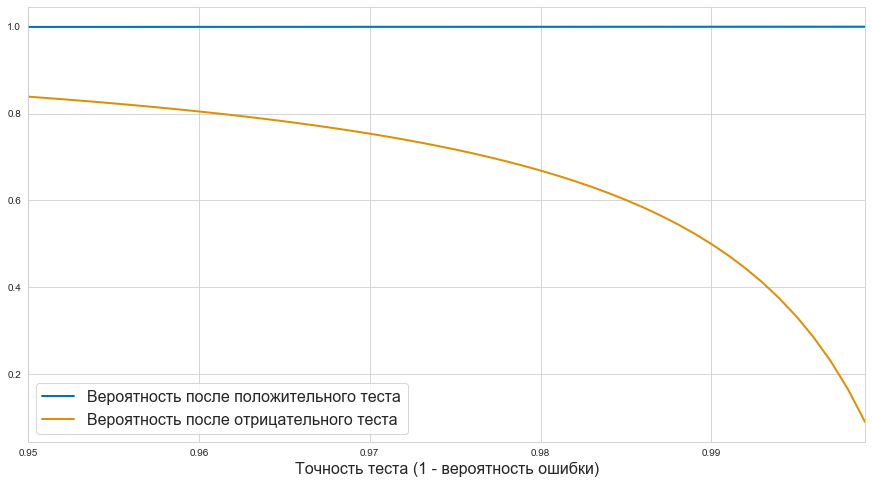

In [72]:
xs = np.arange(0.95,0.999,0.001)
ys_one = np.array([compute_posterior(1, prior_prob=0.99, test_success = test_success) for test_success in xs])
ys_zero = np.array([compute_posterior(0, prior_prob=0.99, test_success = test_success) for test_success in xs])
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.95,0.999))
ax.set_xlabel('Точность теста (1 - вероятность ошибки)', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

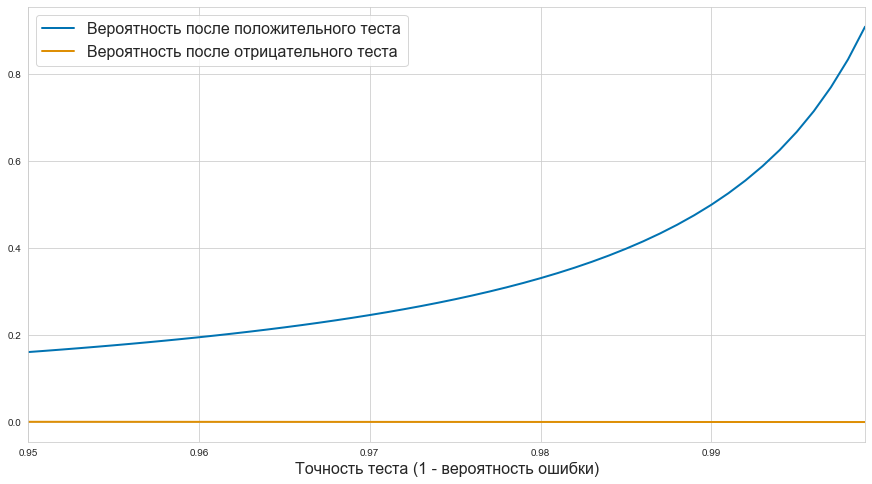

In [66]:
xs = np.arange(0.95,0.999,0.001)
ys_one = np.array([compute_posterior(1,test_success = test_success) for test_success in xs])
ys_zero = np.array([compute_posterior(0,test_success = test_success) for test_success in xs])
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность после отрицательного теста')
ax.set_xlim((0.95,0.999))
ax.set_xlabel('Точность теста (1 - вероятность ошибки)', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

Рекомендации: Пока короновирус не захатил пол мира, стоит улучшать качество теста на false negatives (Иначе false positives). В этом случае вероятность быть больным после положительного теста становиться выше. И тем самым мы более уверено детектируем людей с короновирнусом. В случае улучшения качества на false positives. Эффекта почти не заметно, потому что мы и так хорошо находим людей здоровых